In [1]:
#add a block for reloading the compute_metrics_from_checkpoint
import torch 
import sys
sys.path.append('..')
from eval import predict_large_image_changevit, load_changevit_model
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

/home/hkristen/ChangeViT/model/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/hkristen/ChangeViT/model/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/hkristen/ChangeViT/model/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [2]:
# Define the input paths
image1_path = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/2003_val_small.tif'
image2_path = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/2013_val_small.tif'
mask_path='/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/habitalp_change_2003_2013_B_C_prio3_rasterized_cog.tif'
label_poly_path = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/habitalp_change_2003_2013_B_C_prio3_transitions_refined_agg_merged.gpkg'

train_roi_path = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/split_train.gpkg'
val_roi_path = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/split_val.gpkg'
test_roi_path = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/split_test.gpkg'

experiment_dir = '/home/hkristen/habitalp2/src/models/experiments'



In [3]:
best_changevit_checkpoint = '/home/hkristen/habitalp2/src/models/experiments/TEST_DEV/best_model.pth'
output_path = Path('/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/change_predictions') / Path('change_prediction_' + Path(best_changevit_checkpoint).stem + '_changevit.tif')

In [4]:
model = load_changevit_model(
    checkpoint_path=best_changevit_checkpoint,
    model_type='small',  # or 'tiny' depending on your model
    num_classes=2
)

using MLP layer as FFN
 missing_keys:['pos_embed', 'patch_embed.proj.weight'],
 unexpected_keys:['cls_token', 'blocks.0.ls1.gamma', 'blocks.0.ls2.gamma', 'blocks.1.ls1.gamma', 'blocks.1.ls2.gamma', 'blocks.2.ls1.gamma', 'blocks.2.ls2.gamma', 'blocks.3.ls1.gamma', 'blocks.3.ls2.gamma', 'blocks.4.ls1.gamma', 'blocks.4.ls2.gamma', 'blocks.5.ls1.gamma', 'blocks.5.ls2.gamma', 'blocks.6.ls1.gamma', 'blocks.6.ls2.gamma', 'blocks.7.ls1.gamma', 'blocks.7.ls2.gamma', 'blocks.8.ls1.gamma', 'blocks.8.ls2.gamma', 'blocks.9.ls1.gamma', 'blocks.9.ls2.gamma', 'blocks.10.ls1.gamma', 'blocks.10.ls2.gamma', 'blocks.11.ls1.gamma', 'blocks.11.ls2.gamma']
model_type: small,
 checkpoint_path: checkpoint/dinov2_vits14_pretrain.pth
initialize: c2_c5
initialize: c3_c5
initialize: c4_c5
initialize: fuse
initialize: structure_enhance
initialize: up_c5
initialize: 0
initialize: 1
initialize: up_c4
initialize: 0
initialize: 1
initialize: up_c3
initialize: 0
initialize: 1
initialize: classfier
initialize: 0
initiali

In [5]:
prediction, probability_map = predict_large_image_changevit(
    model=model,
    image1_path=image1_path,   
    image2_path=image2_path,
    output_path=output_path,
    num_classes=2,  # Binary change detection
    tile_size=246,
    overlap=32,  # Recommended overlap to avoid edge artifacts
    save_probability_map=False
)

Adjusted tile_size to 256 to be a multiple of 16
Image size: 24256x31296, Tile size: 256x256, Overlap: 32, Stride: 224
Processing 109 x 140 = 15260 tiles...
Processed tile 10/15260...
Processed tile 20/15260...
Processed tile 30/15260...
Processed tile 40/15260...
Processed tile 50/15260...
Processed tile 60/15260...
Processed tile 70/15260...
Processed tile 80/15260...
Processed tile 90/15260...
Processed tile 100/15260...
Processed tile 110/15260...
Processed tile 120/15260...
Processed tile 130/15260...
Processed tile 140/15260...
Processed tile 150/15260...
Processed tile 160/15260...
Processed tile 170/15260...
Processed tile 180/15260...
Processed tile 190/15260...
Processed tile 200/15260...
Processed tile 210/15260...
Processed tile 220/15260...
Processed tile 230/15260...
Processed tile 240/15260...
Processed tile 250/15260...
Processed tile 260/15260...
Processed tile 270/15260...
Processed tile 280/15260...
Processed tile 290/15260...
Processed tile 300/15260...
Processed ti

In [6]:
# Class mapping 8 Classes - Refined with Manuela (9 with background = 0)
# labels_pth = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/habitalp_change_2003_2013_B_C_prio3_transitions_refined_agg_merged.gpkg'
#class_column = 'transition_category_refined_agg
#
#Class mapping: {'Mature_Tree_Density_Loss': 1, 'Clearcut_Loss': 2, 'Forest_Density_Gain': 3, 'Other_Transition': 4, 
# 'Forest_Stage_Progression': 5, 'Early_Forest_Establishment': 6, 'Forest_Setback_YoungLoss': 7, 'Old_Growth_Density_Loss': 8}

# Check class balances in train/val/split

In [7]:
# Class mapping 8 Classes - Refined with Manuela (9 with background = 0)
# labels_pth = '/home/hkristen/habitalp2/data/processed/orthos_rgb_2003_2013/habitalp_change_2003_2013_B_C_prio3_transitions_refined_agg_merged.gpkg'
#class_column = 'transition_category_refined_agg
#
#Class mapping: {'Mature_Tree_Density_Loss': 1, 'Clearcut_Loss': 2, 'Forest_Density_Gain': 3, 'Other_Transition': 4, 
# 'Forest_Stage_Progression': 5, 'Early_Forest_Establishment': 6, 'Forest_Setback_YoungLoss': 7, 'Old_Growth_Density_Loss': 8}

In [8]:
label_poly = gpd.read_file(label_poly_path)
train_roi = gpd.read_file(train_roi_path)
val_roi = gpd.read_file(val_roi_path)
test_roi = gpd.read_file(test_roi_path)

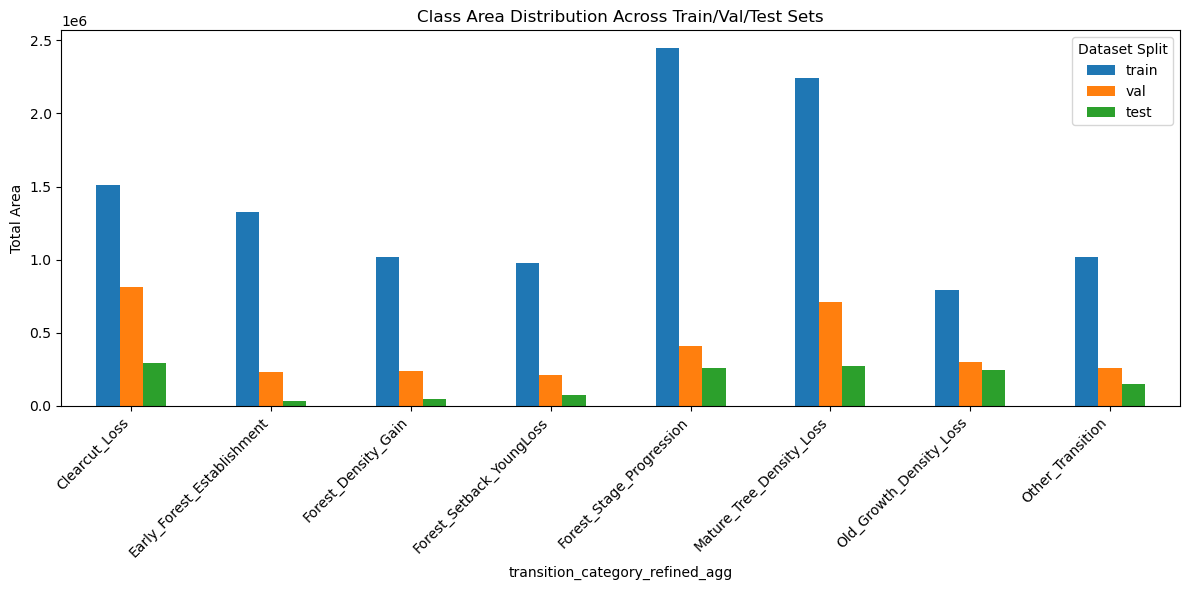

In [9]:
# Calculate intersection with each ROI
train_labels = gpd.overlay(label_poly, train_roi, how='intersection')
val_labels = gpd.overlay(label_poly, val_roi, how='intersection')
test_labels = gpd.overlay(label_poly, test_roi, how='intersection')

# Calculate area for each class in each split
train_areas = train_labels.groupby('transition_category_refined_agg').area.sum()
val_areas = val_labels.groupby('transition_category_refined_agg').area.sum()
test_areas = test_labels.groupby('transition_category_refined_agg').area.sum()


# Create dataframe with class areas for each split
class_stats = gpd.pd.DataFrame({
    'train': train_areas,
    'val': val_areas,
    'test': test_areas
})

# Fill NaN values with 0 and sort index
class_stats = class_stats.fillna(0)
class_stats = class_stats.sort_index()

# Calculate total areas
class_stats['total'] = class_stats['train'] + class_stats['val'] + class_stats['test']

# Calculate percentages based on area for each dataset
train_total_area = class_stats['train'].sum()
val_total_area = class_stats['val'].sum()
test_total_area = class_stats['test'].sum()
dataset_total_area = class_stats['total'].sum()

# Ensure division by zero doesn't occur if a split has zero total area (though unlikely)
class_stats['train_pct'] = (class_stats['train'] / train_total_area * 100).round(1).astype(str) + '%' if train_total_area > 0 else '0.0%'
class_stats['val_pct'] = (class_stats['val'] / val_total_area * 100).round(1).astype(str) + '%' if val_total_area > 0 else '0.0%'
class_stats['test_pct'] = (class_stats['test'] / test_total_area * 100).round(1).astype(str) + '%' if test_total_area > 0 else '0.0%'
class_stats['total_pct'] = (class_stats['total'] / dataset_total_area * 100).round(1).astype(str) + '%' if dataset_total_area > 0 else '0.0%'


# Plot as bar chart using area
class_stats[['train','val','test']].plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Area') # Updated label
plt.title('Class Area Distribution Across Train/Val/Test Sets') # Updated title
plt.legend(title='Dataset Split')
plt.tight_layout()
plt.show()

In [10]:
class_stats

,train,val,test,total,train_pct,val_pct,test_pct,total_pct
transition_category_refined_agg,,,,,,,,
Clearcut_Loss,1.513325e+06,814409.639460,295086.441141,2.622821e+06,13.3%,25.6%,21.7%,16.5%
Early_Forest_Establishment,1.322674e+06,234434.493627,31907.461821,1.589016e+06,11.7%,7.4%,2.3%,10.0%
Forest_Density_Gain,1.019308e+06,236900.827922,43789.127235,1.299998e+06,9.0%,7.5%,3.2%,8.2%
Forest_Setback_YoungLoss,9.801997e+05,211078.521822,74051.393757,1.265330e+06,8.6%,6.6%,5.4%,8.0%
Forest_Stage_Progression,2.446700e+06,408772.867689,256103.999161,3.111576e+06,21.6%,12.9%,18.8%,19.6%
Mature_Tree_Density_Loss,2.244708e+06,713177.760005,269838.070905,3.227723e+06,19.8%,22.5%,19.8%,20.3%
Old_Growth_Density_Loss,7.949994e+05,296524.721670,243475.839030,1.335000e+06,7.0%,9.3%,17.9%,8.4%
Other_Transition,1.016169e+06,261367.815856,148258.860605,1.425796e+06,9.0%,8.2%,10.9%,9.0%
